In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('Brain'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Brain\Test\glioma_tumor\image(1).jpg
Brain\Test\glioma_tumor\image(10).jpg
Brain\Test\glioma_tumor\image(100).jpg
Brain\Test\glioma_tumor\image(11).jpg
Brain\Test\glioma_tumor\image(12).jpg
Brain\Test\glioma_tumor\image(13).jpg
Brain\Test\glioma_tumor\image(14).jpg
Brain\Test\glioma_tumor\image(15).jpg
Brain\Test\glioma_tumor\image(16).jpg
Brain\Test\glioma_tumor\image(17).jpg
Brain\Test\glioma_tumor\image(18).jpg
Brain\Test\glioma_tumor\image(19).jpg
Brain\Test\glioma_tumor\image(2).jpg
Brain\Test\glioma_tumor\image(20).jpg
Brain\Test\glioma_tumor\image(21).jpg
Brain\Test\glioma_tumor\image(22).jpg
Brain\Test\glioma_tumor\image(23).jpg
Brain\Test\glioma_tumor\image(24).jpg
Brain\Test\glioma_tumor\image(25).jpg
Brain\Test\glioma_tumor\image(26).jpg
Brain\Test\glioma_tumor\image(27).jpg
Brain\Test\glioma_tumor\image(28).jpg
Brain\Test\glioma_tumor\image(29).jpg
Brain\Test\glioma_tumor\image(3).jpg
Brain\Test\glioma_tumor\image(30).jpg
Brain\Test\glioma_tumor\image(31).jpg
Brain\Test\gli

Brain\Train\pituitary_tumor\p (1).jpg
Brain\Train\pituitary_tumor\p (10).jpg
Brain\Train\pituitary_tumor\p (100).jpg
Brain\Train\pituitary_tumor\p (101).jpg
Brain\Train\pituitary_tumor\p (102).jpg
Brain\Train\pituitary_tumor\p (103).jpg
Brain\Train\pituitary_tumor\p (104).jpg
Brain\Train\pituitary_tumor\p (105).jpg
Brain\Train\pituitary_tumor\p (106).jpg
Brain\Train\pituitary_tumor\p (107).jpg
Brain\Train\pituitary_tumor\p (108).jpg
Brain\Train\pituitary_tumor\p (109).jpg
Brain\Train\pituitary_tumor\p (11).jpg
Brain\Train\pituitary_tumor\p (110).jpg
Brain\Train\pituitary_tumor\p (111).jpg
Brain\Train\pituitary_tumor\p (112).jpg
Brain\Train\pituitary_tumor\p (113).jpg
Brain\Train\pituitary_tumor\p (114).jpg
Brain\Train\pituitary_tumor\p (115).jpg
Brain\Train\pituitary_tumor\p (116).jpg
Brain\Train\pituitary_tumor\p (117).jpg
Brain\Train\pituitary_tumor\p (118).jpg
Brain\Train\pituitary_tumor\p (119).jpg
Brain\Train\pituitary_tumor\p (12).jpg
Brain\Train\pituitary_tumor\p (120).jpg
Brain

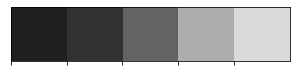

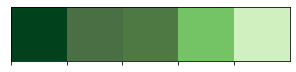

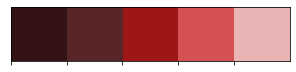

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train = []
y_train = []
image_size = 128
for i in labels:
    folderPath = os.path.join('Brain/Train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Brain/Test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 134.78it/s]


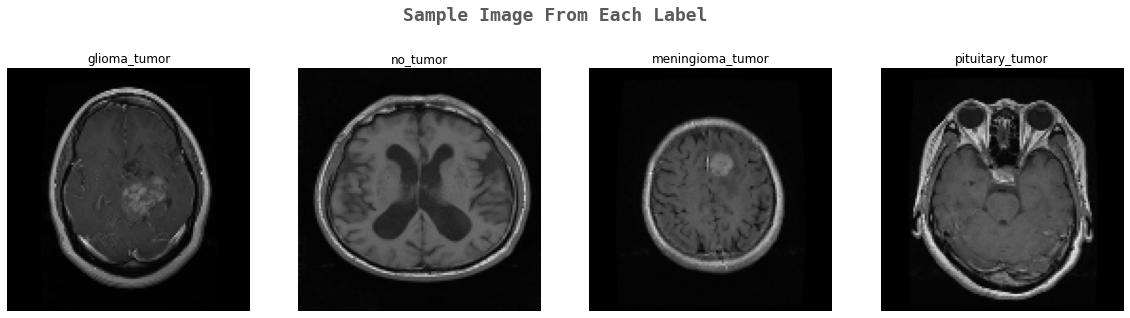

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train.shape

(3264, 128, 128, 3)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(3264, 128, 128, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2
Incepres = InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))

In [12]:
model = Incepres.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=Incepres.input, outputs = model)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 2, 2, 192)    399360      block8_2_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_172 (BatchN (None, 2, 2, 192)    576         conv2d_172[0][0]                 
__________________________________________________________________________________________________
activation_172 (Activation)     (None, 2, 2, 192)    0           batch_normalization_172[0][0]    
__________________________________________________________________________________________________
conv2d_173 (Conv2D)             (None, 2, 2, 224)    129024      activation_172[0][0]             
__________________________________________________________________________________________________
batch_normalization_173 (BatchN (None, 2, 2, 224)    672         conv2d_173[0][0]                 
__________

In [14]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [15]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("InceptionResNetV2.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [16]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
 1/83 [..............................] - ETA: 0s - loss: 1.6320 - accuracy: 0.3750WARNING:tensorflow:From C:\Users\Anorb\anaconda3\envs\Tensorflow_env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
83/83 [==============================] - ETA: 0s - loss: 0.6417 - accuracy: 0.8002
Epoch 00001: val_accuracy improved from -inf to 0.23469, saving model to InceptionResNetV2.h5
83/83 [==============================] - 758s 9s/step - loss: 0.6417 - accuracy: 0.8002 - val_loss: 7.1798 - val_accuracy: 0.2347
Epoch 2/50
83/83 [==============================] - ETA: 0s - loss: 0.1879 - accuracy: 0.9349
Epoch 00002: val_accuracy improved from 0.23469 to 0.86395, saving model to InceptionResNetV2.h5
83/83 [==============================] - 811s 10s/step - loss: 0.1879 - accuracy: 0.9349 - val_loss: 0.5146

Epoch 26/50
83/83 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 00026: val_accuracy did not improve from 0.97279

Epoch 00026: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.
83/83 [==============================] - 751s 9s/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1367 - val_accuracy: 0.9694
Epoch 27/50
83/83 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9996
Epoch 00027: val_accuracy did not improve from 0.97279
83/83 [==============================] - 751s 9s/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1366 - val_accuracy: 0.9694
Epoch 28/50
83/83 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996
Epoch 00028: val_accuracy did not improve from 0.97279

Epoch 00028: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.
83/83 [==============================] - 751s 9s/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1373 - val_accuracy: 0.96

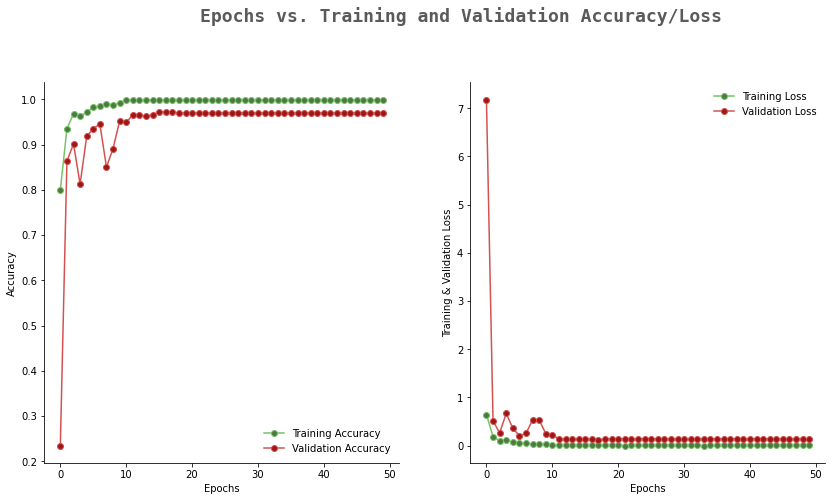

In [17]:
filterwarnings('ignore')

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [19]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        93
           1       1.00      1.00      1.00        51
           2       0.96      0.97      0.96        96
           3       0.98      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



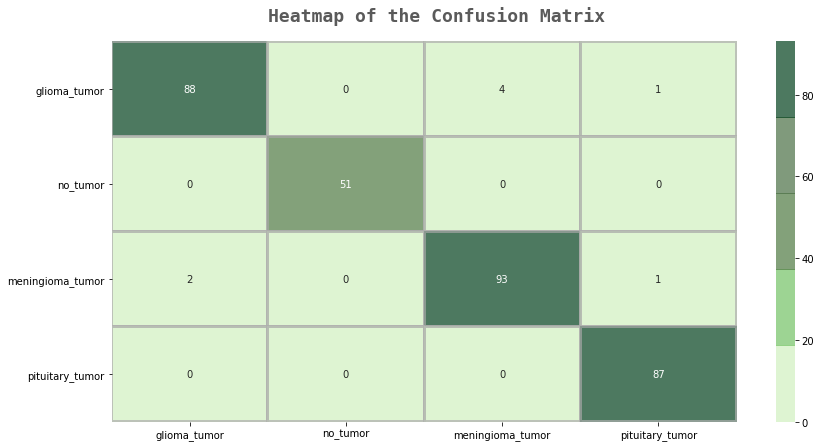

In [20]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()